In [ ]:
#clone YOLOv5 and 
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt # install dependencies
%pip install -q roboflow

import torch
import os
from IPython.display import Image, clear_output  # to display images

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12034, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 12034 (delta 0), reused 1 (delta 0), pack-reused 12029
Receiving objects: 100% (12034/12034), 12.52 MiB | 27.68 MiB/s, done.
Resolving deltas: 100% (8271/8271), done.
/content/yolov5
     |████████████████████████████████| 1.6 MB 5.3 MB/s 
     |████████████████████████████████| 145 kB 5.1 MB/s 
     |████████████████████████████████| 178 kB 52.7 MB/s 
     |████████████████████████████████| 1.1 MB 51.4 MB/s 
     |████████████████████████████████| 67 kB 5.8 MB/s 
     |████████████████████████████████| 54 kB 2.4 MB/s 
     |████████████████████████████████| 138 kB 58.2 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
Setup complete. Using torch 1.12.1+cu113 (CPU)


In [ ]:
!unzip -q ../data.zip -d ../

In [ ]:
!python train.py --img 416 --batch 16 --epochs 30 --data custom_data.yaml --weights yolov5s.pt --cfg yolov5s-custom.yaml --cache

train: weights=yolov5s.pt, cfg=yolov5s-custom.yaml, data=custom_data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=30, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, de

In [ ]:
# test video
!python detect.py --weights runs/train/exp3/weights/best.pt --img 416 --conf 0.5 --source ../test/video/caulastrea.mp4

detect: weights=['runs/train/exp3/weights/best.pt'], source=../test/video/caulastrea.mp4, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-57-gf2b8f3f Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s-custom summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
video 1/1 (1/2725) /content/test/video/caulastrea.mp4: 256x416 (no detections), 118.3ms
video 1/1 (2/2725) /content/test/video/caulastrea.mp4: 256x416 (no detections), 108.6ms
video 1/1 (3/2725) /content/test/video/caulastrea.mp4: 256x416 (no detections), 108.7ms
video 1/1 (4/2725) /content/test/video/caulastrea.mp4: 256x416 (no detections), 102.9ms
video 1/1 (5/27

In [ ]:
# test images
!python detect.py --weights runs/train/exp3/weights/best.pt --img 416 --conf 0.5 --source ../test/

detect: weights=['runs/train/exp3/weights/best.pt'], source=../test/, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.2-57-gf2b8f3f Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s-custom summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs
image 1/5 /content/test/2560px-Coral_reef_at_palmyra_jpg.rf.a0b323668fa5b476b88eafc793932554.jpg: 288x416 (no detections), 129.4ms
image 2/5 /content/test/Acanthophyllia.jpg: 288x416 9 Acanthophyllias, 117.3ms
image 3/5 /content/test/Caulastrea-1.jpg: 416x416 7 Caulastreas, 164.3ms
image 4/5 /content/test/cynarina.jpg: 384x416 1 Cynarina, 148.9ms
image 5/5 /content/test/traffic_jam_10

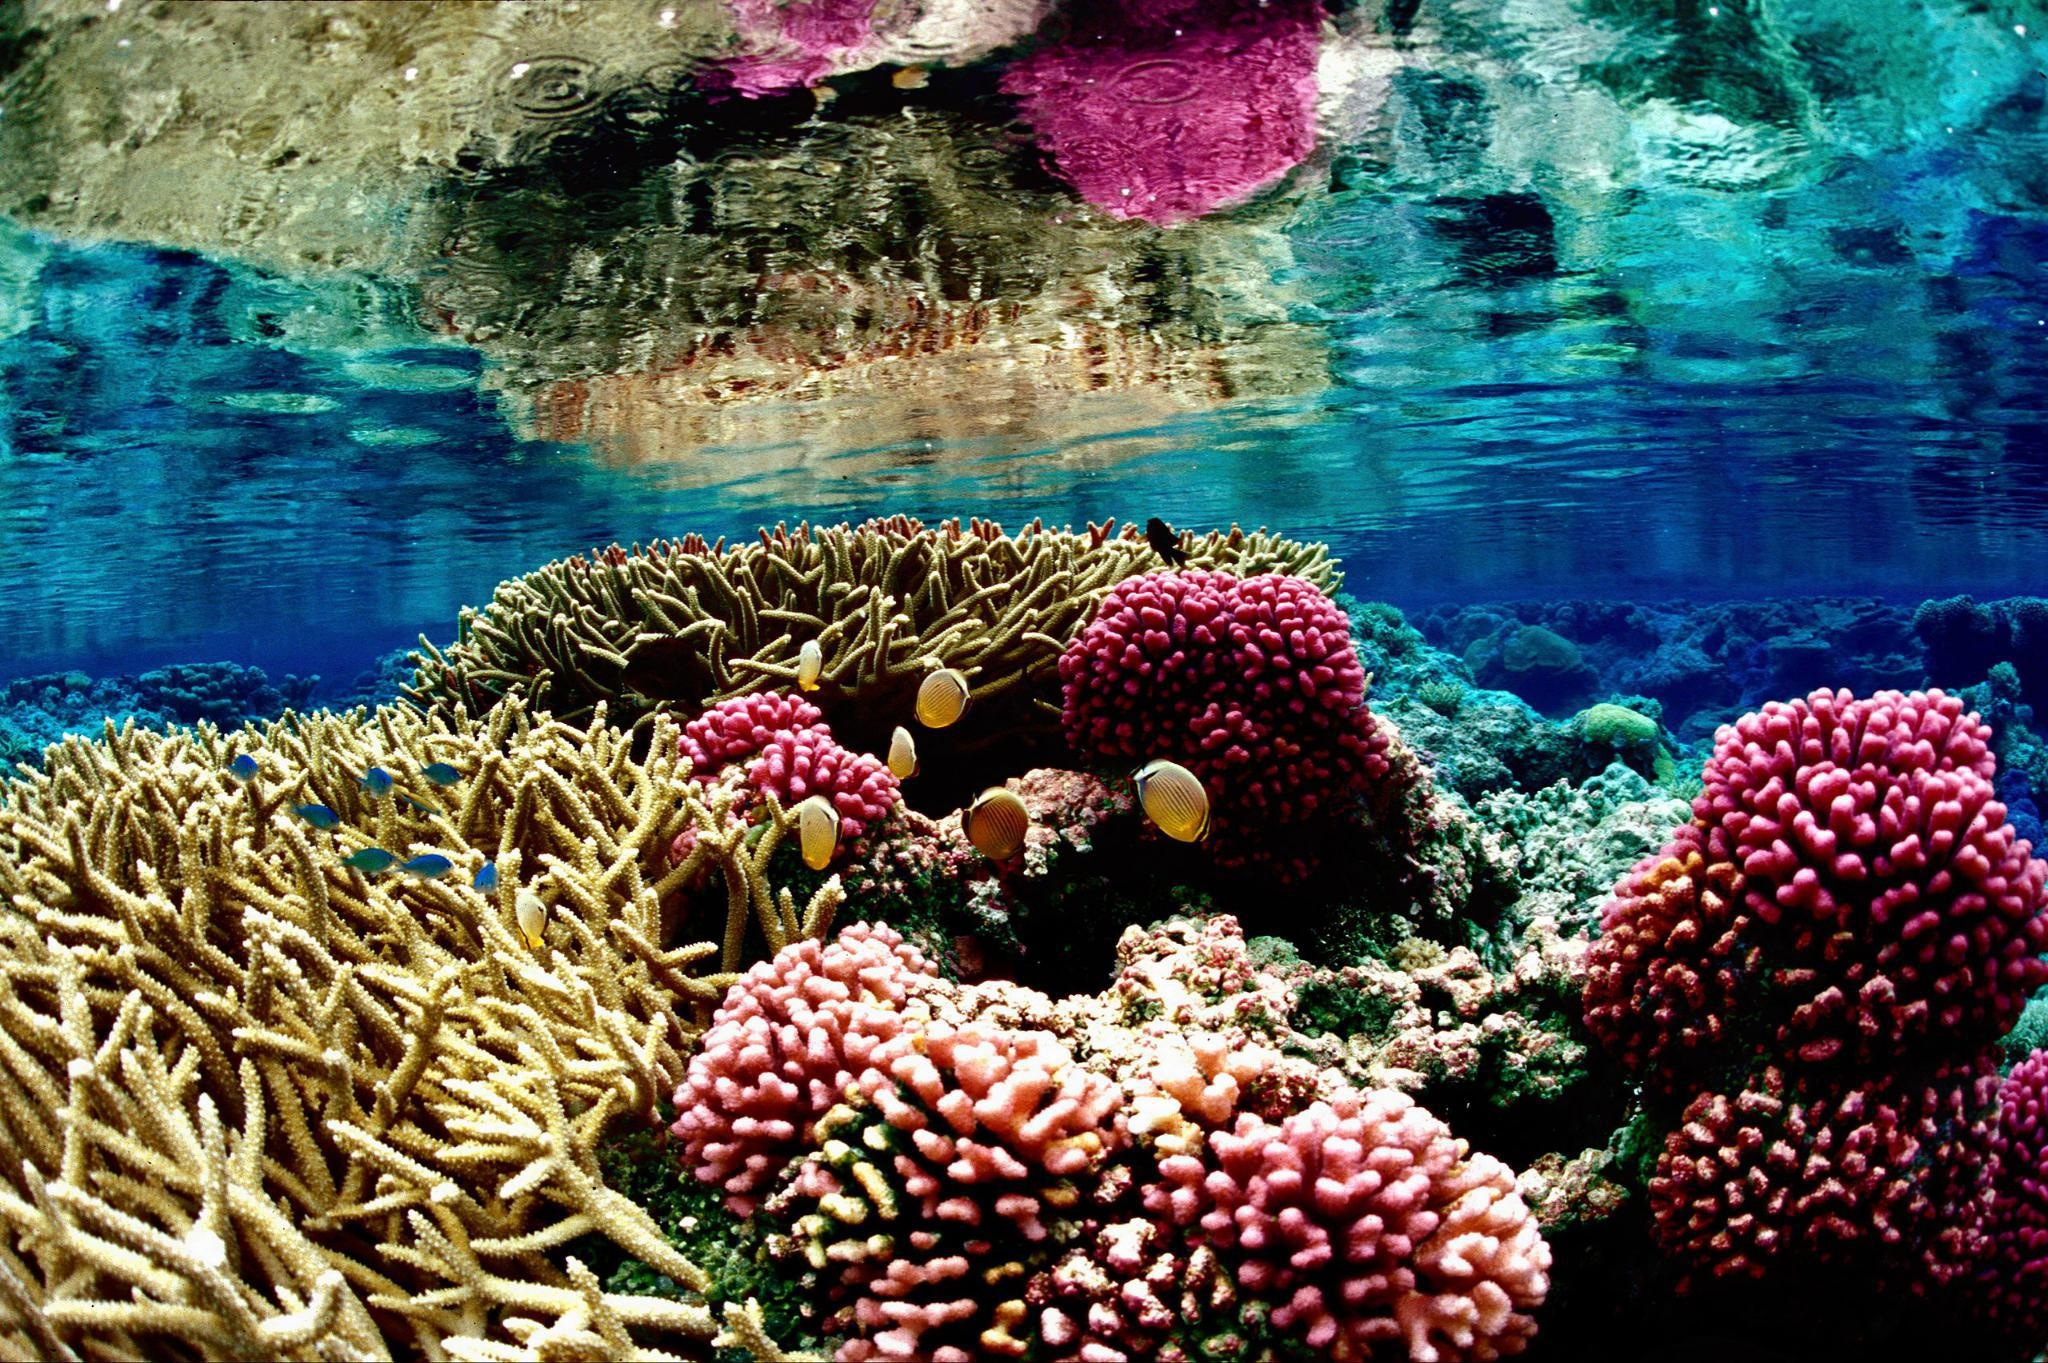

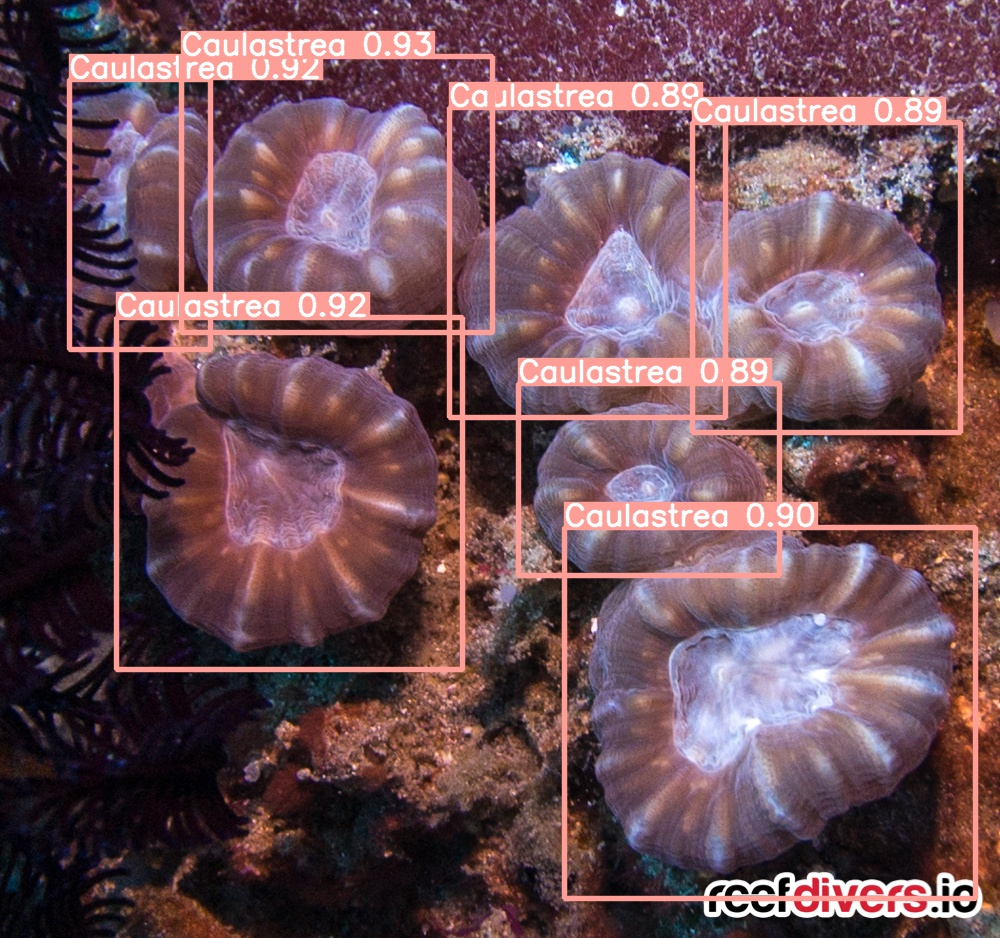

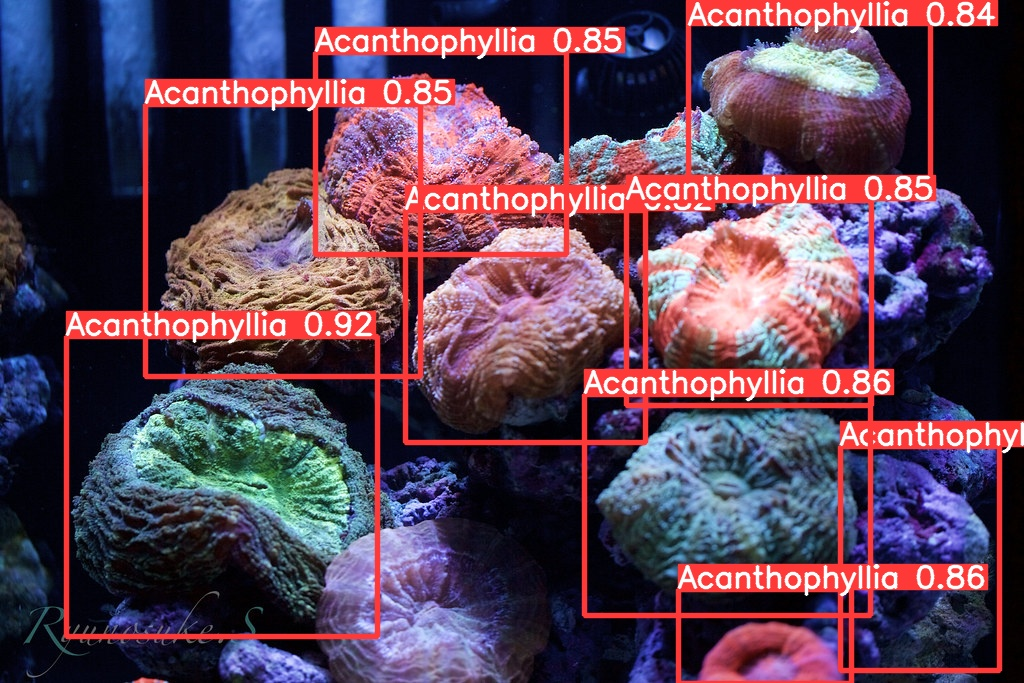

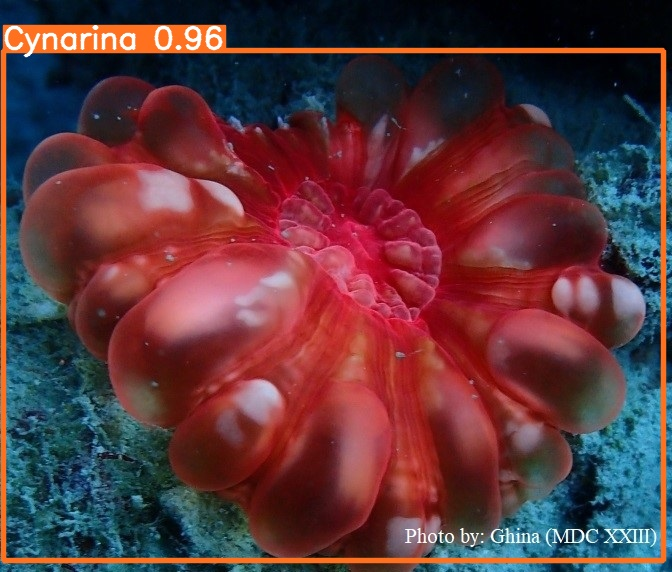

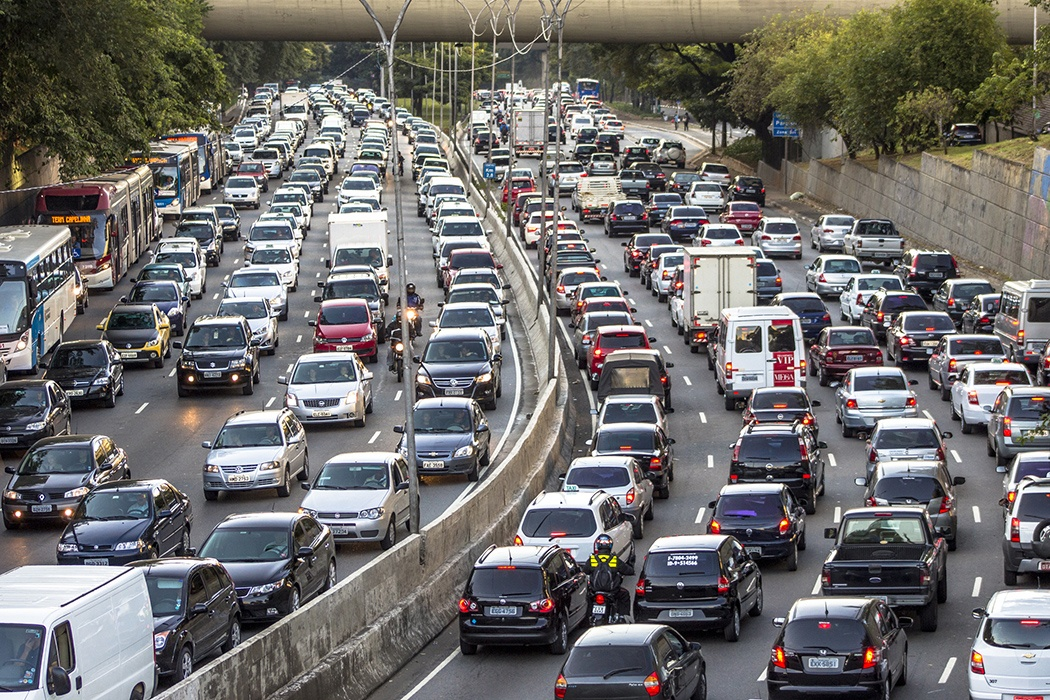

In [ ]:
# display predicted images
import glob
from IPython.display import Image, display

for imageName in glob.glob('runs/detect/exp6/*.jpg'): #assuming JPG
    display(Image(filename=imageName))
    print("\n")

In [ ]:
!python export.py --weights runs/train/exp3/weights/best.pt --include tflite

export: data=data/coco128.yaml, weights=['runs/train/exp3/weights/best.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.2-57-gf2b8f3f Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s-custom summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp3/weights/best.pt with output shape (1, 25200, 8) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.8.2...

                 from  n    params  module                                  arguments                     
2022-08-26 15:44:13.588064: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0             

In [ ]:
# !python export.py --weights runs/train/exp/weights/best.pt --img 416 --include tflite
!python export.py --weights runs/train/exp/weights/best.pt --include tflite --img 640

export: data=data/coco128.yaml, weights=['runs/train/exp/weights/best.pt'], imgsz=[640], batch_size=1, device=cpu, half=False, inplace=False, train=False, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['tflite']
YOLOv5 🚀 v6.2-61-gffbce38 Python-3.7.13 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s-custom summary: 213 layers, 7018216 parameters, 0 gradients, 15.8 GFLOPs

PyTorch: starting from runs/train/exp/weights/best.pt with output shape (1, 25200, 8) (13.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.8.2...

                 from  n    params  module                                  arguments                     
2022-08-27 06:50:42.974828: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  

In [ ]:
!python detect.py --weights yolov5s.tflite